# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Programação para Ciência de Dados</font>

## <font color="blue">Pandas Parte II - Exercícios</font>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

#### <font color="red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</font>

Os exercícios a seguir farão uso do arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> disponível para download no sistema _Moodle_. Este conjunto de dados fornece informações a respeito das escolas de ensino básico, fundamental e médio do estado de São Paulo. O significado de cada coluna pode ser encontrado no arquivo <font style="font-family: monaco">DicionarioESC.pdf</font> também disponível no moodle.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Os comandos abaixo são apenas para modificar como as informações serão apresentadas
# no notebook

# mostra no máximo 50 colunas
pd.set_option('display.max_columns', 50)

# aumenta o tamanho das figuras geradas pelo matplotlib
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### Exercício 1)
Carregue o arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> e armazene-o em uma variável DataFrame chamada `escolas`. Visualize as primeiras 5 linhas do DataFrame.

In [4]:
escolas = pd.read_csv('ESC2013_RMSP_CEM.csv')
escolas.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,...,230.40,220.14,4.18,229.93,229.88,4.33,242.32,248.41,4.85,247.08,238.32,4.76,NaN,3.7,4.2,4.5,4.4,NaN,NaN,NaN,NaN,NaN,NaN,47.3253,Medio
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,...,241.29,226.74,4.47,172.40,170.80,2.39,249.23,244.94,4.90,244.75,231.59,4.61,NaN,4.2,2.3,4.7,4.4,451.33,469.34,480.52,485.11,444.71,469.92,49.3778,Medio


### Exercício 2)
O arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> possui muitos valores faltantes. Encontre e imprima o nome da coluna com mais valores faltantes. Calcule também o número de valores faltantes em tal coluna.

__DICA__: Utilize uma combinação dos métodos do <font color='blue'>pandas</font>:

[isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) que retorna uma máscara com True nas posições onde valores faltantes ocorrem<br>
[idxmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) retorna o rótulo onde o valor máximo que ocorre em um dado eixo (rótulo da linha ou coluna dependento do valor do parâmetro `axis`)<br> 
[max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html) que retorna o valor máximo em um eixo especificado

In [5]:
na = escolas.isna().sum()
x = na.idxmax(), na.max()
x

('COD_SC', 10937)

### Exercício 3)
Verifique se existem linhas duplicadas no conjunto de dados

__Dica:__ Utilize o método <font color='blue'>duplicated</font> do <font color='blue'>pandas</font>

In [6]:
escolas[escolas.duplicated()]

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL


### Exercício 4)
A coluna 'COD_DEP' do DataFrame `escolas` representa o código da dependência administrativa da escola (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada).

Calcule quantas escolas federais, estaduais, municipais e particulares existem na base de dados. Armazene a contagem em uma série cujos rótulos são o tipo de dependência e os valores correspondentes o número de ocorrências da dependência administrativa.

**DICA**: Utilize o método <font color='blue'>value_counts</font> do <font color='blue'>pandas</font>

In [7]:
escolas["COD_DEP"].value_counts()

4    5225
3    3405
2    2303
1       4
Name: COD_DEP, dtype: int64

### Exercício 5) 
O Pandas também oferece recursos para visualização que são simples de utilizar. Utilize o método <font color='blue'>plot</font> do <font color='blue'>pandas</font> com o parâmetro `bar` para gerar um gráfico de barras com o número de escolas calculadas na célula acima. Para mais informações sobre os recursos gráficos disponíveis no pandas veja documentação [aqui](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).

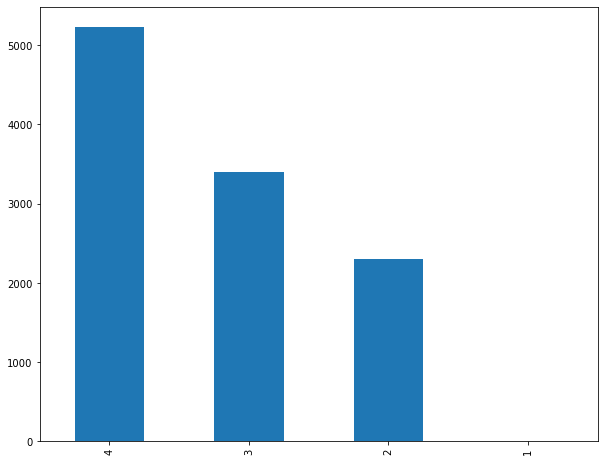

In [8]:
escolas["COD_DEP"].value_counts().plot(kind='bar');

### Exercício 6)
Como visto anteriormente, o conjunto de dados do arquivo <font style="font-family: monaco">ESC2013\_RMSP\_CEM.csv</font> possui muitos valores faltantes. Utilize uma combinação do método <font color='blue'>map</font> e <font color='blue'>isna</font> para encontrar a porcentagem de linhas do DataFrame que possuem dados faltantes.

In [24]:
esc2013 = pd.read_csv('ESC2013_RMSP_CEM.csv')
x =  esc2013.isna().any(axis=1).sum()/esc2013.shape[0]
x

1.0

### Exercício 7)

O resultado do exercício anterior mostra que todas as linhas do conjunto de dados <font style="font-family: monaco">ESC2013_RMSP_CEM.csv</font> possuem pelo menos um dado faltante. Assim, se adotarmos a estratégia de remover as linhas que possuem dados faltantes, todo o conjunto de dados será descartado. 

Uma alternativa é remover do conjunto de dados as colunas onde o número de valores faltantes é elevado. Escreva um código que gere um novo DataFrame chamado `escolas30` contendo as colunas do DataFrame `escolas` com no máximo 30% de valores faltantes. 

__Dica:__ Gere uma série booleana onde os rótulos das linhas são os rótulos das colunas do DataFrame `escolas`, sendo os valores 'True' nas entradas correspondendo às colunas
com menos que 30% de valores faltantes. Utilize a série booleana em conjunto com o comando <font color='blue'>loc</font> do <font color='blue'>pandas</font> para extrair as colunas desejadas.

In [51]:
escolas30 = esc2013.loc[:, (esc2013.isna().sum()/esc2013.shape[0]) < 0.3]
escolas30

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,REG_IN_PE,REG_FU_8A,REG_FU_9A,REG_MED,REG_MED_I,REG_MED_N,REG_MED_P,ENS_ESP,ESP_IN_CR,ESP_IN_PE,ESP_FU_8A,ESP_FU_9A,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,9280,-45845711,-23529824,35221247,35221247,HENRIQUETA MESTRA EMEF,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,CENTRO,8970000.0,RUA XV DE NOVEMBRO,1070,11,46961863,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10933,9281,-45844148,-23531405,35006737,35006737,OLGA CHAKUR FARAH PROFESSORA,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,2,Estadual,CENTRO,8970000.0,AV ANTONIO P DE MIRANDA,101,11,46961252,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10934,9282,-45841153,-23529823,35224807,35224807,MARIA APARECIDA FREIRE DE FARIA PROFA EMEI,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,ROSARIO,8970000.0,RUA ROQUE TORRAGA,25,11,46963013,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10935,11476,-45858908,-23510052,35662082,35662082,PEDRO DE SOUZA BRITO EMEF,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,PARAITINGUINHA,8970000.0,ESTRADA DO OURO BRANCO KM02,S/N,11,46961280,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Exercício 8)

Quantas colunas restaram no DataFrame `escolas30`? Recalcule a porcentagem de linhas com pelo menos um valor faltante.

In [57]:
escolas30.isna().any(axis=1).sum()/escolas30.shape[0]

0.10066745908384384

### Exercício 9)

O DataFrame `escolas30` possui poucos valores faltantes. Preencha os valores faltantes com o valor da _moda_  da coluna onde o valor faltante ocorre. 

__Dica:__ Utilize o método <font color='blue'>mode</font> combinado com <font color='blue'>fillna</font> do <font color='blue'>pandas</font>. Note que o método  <font color='blue'>mode</font> pode retornar vários valores caso haja um empate no cálculo da moda. Escolha o primeiro dentre os valores retornados como o valor da moda.

In [67]:
escolas30 = escolas30.fillna(escolas30.mode().iloc[0])
escolas30

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,REG_IN_PE,REG_FU_8A,REG_FU_9A,REG_MED,REG_MED_I,REG_MED_N,REG_MED_P,ENS_ESP,ESP_IN_CR,ESP_IN_PE,ESP_FU_8A,ESP_FU_9A,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,9280,-45845711,-23529824,35221247,35221247,HENRIQUETA MESTRA EMEF,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,CENTRO,8970000.0,RUA XV DE NOVEMBRO,1070,11,46961863,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
10933,9281,-45844148,-23531405,35006737,35006737,OLGA CHAKUR FARAH PROFESSORA,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,2,Estadual,CENTRO,8970000.0,AV ANTONIO P DE MIRANDA,101,11,46961252,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10934,9282,-45841153,-23529823,35224807,35224807,MARIA APARECIDA FREIRE DE FARIA PROFA EMEI,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,ROSARIO,8970000.0,RUA ROQUE TORRAGA,25,11,46963013,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10935,11476,-45858908,-23510052,35662082,35662082,PEDRO DE SOUZA BRITO EMEF,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,3,Municipal,PARAITINGUINHA,8970000.0,ESTRADA DO OURO BRANCO KM02,S/N,11,46961280,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Exercício 10)

Certifique que o DataFrame `escolas30` não possui qualquer valor faltante após o tratamento realizado no exercício anterior.

In [69]:
escolas30.isna().any()

ID           False
LONGITUDE    False
LATITUDE     False
CODESC       False
CODESCTX     False
NOMEESC      False
NOMEMUN      False
CODMUN       False
NOMDIST      False
CODDIST      False
COD_DEP      False
TIP_DEP      False
BAIRRO       False
CEP          False
END_ESC      False
NUM_ESC      False
DDD          False
TELEFONE     False
LOCALIZA     False
LAB_INF      False
QD_ESP_C     False
QD_ESP_D     False
BIBLIO       False
ENS_REG      False
REG_IN_CR    False
REG_IN_PE    False
REG_FU_8A    False
REG_FU_9A    False
REG_MED      False
REG_MED_I    False
REG_MED_N    False
REG_MED_P    False
ENS_ESP      False
ESP_IN_CR    False
ESP_IN_PE    False
ESP_FU_8A    False
ESP_FU_9A    False
ESP_MED      False
ESP_MED_I    False
ESP_MED_N    False
ESP_MED_P    False
ESP_EJA_F    False
ESP_EJA_M    False
EJA          False
EJA_FUND     False
EJA_MED      False
EJA_PROJ     False
dtype: bool